In [9]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from collections import Counter

from utils.fakedata import FakeData
from utils.semparse import SemParse

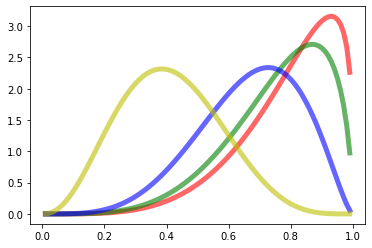

In [2]:
fig, ax = plt.subplots(1,1)
a, b = 5, 1.3
a2, b2 = 5, 1.6
a3, b3 = 5, 2.5
a4, b4 = 3.5, 5

x = np.linspace(beta.ppf(0.01, 1, 1), beta.ppf(0.99, 1, 1), 100)
ax.plot(x, beta.pdf(x, a, b), 'r-', lw=5, alpha=0.6)
ax.plot(x, beta.pdf(x, a2, b2), 'g-', lw=5, alpha=0.6)
ax.plot(x, beta.pdf(x, a3, b3), 'b-', lw=5, alpha=0.6)
ax.plot(x, beta.pdf(x, a4, b4), 'y-', lw=5, alpha=0.6)
plt.show()

# Threshold Grid-Search

In [3]:
s = SemParse()

2020-08-26 19:07:36 WARNING: Can not find mwt: default from official model list. Ignoring it.
2020-08-26 19:07:36 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | spacy     |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| sentiment | sstplus   |
| ner       | ontonotes |

2020-08-26 19:07:36 INFO: Use device: gpu
2020-08-26 19:07:36 INFO: Loading: tokenize
2020-08-26 19:07:37 INFO: Loading: pos
2020-08-26 19:07:40 INFO: Loading: lemma
2020-08-26 19:07:40 INFO: Loading: depparse
2020-08-26 19:07:41 INFO: Loading: sentiment
2020-08-26 19:07:42 INFO: Loading: ner
2020-08-26 19:07:43 INFO: Done loading processors!


In [4]:
candidate_thresholds = list(np.linspace(0.7,0.9,20,endpoint=False))

In [5]:
def return_results(dataset:FakeData,threshold:float):
    results_list = []
    for i,u in enumerate(tqdm(dataset.utterances)):
        results_list += s.evaluate_truth(u,dataset.class_output[i],threshold)
    return results_list

In [6]:
def compare_results(produced_labels:list,target_labels:list):
    results = [1 if x == target_labels[i] else 0 for i, x in enumerate(produced_labels)]
    return sum(results) / len(results)


In [7]:
f = FakeData(1000)
compare_results(return_results(f,0.8),f.correct)

100%|██████████| 1000/1000 [03:01<00:00,  5.52it/s]


0.802

In [10]:
Counter(f.correct)

Counter({True: 478, False: 522})